### **Importing Necessary Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Load Bangle Data**

In [2]:
bangle_data = pd.read_csv("Data/HR_Lab_Data_Day_1/HRV121M_Finger_Anticipatory/bangle.csv")
print(bangle_data.head())

    timestamp_ms  value
0  1733942489877   5294
1  1733942489897   5278
2  1733942489918   5246
3  1733942489938   5246
4  1733942489958   5246


### **Plot Bangle Data**

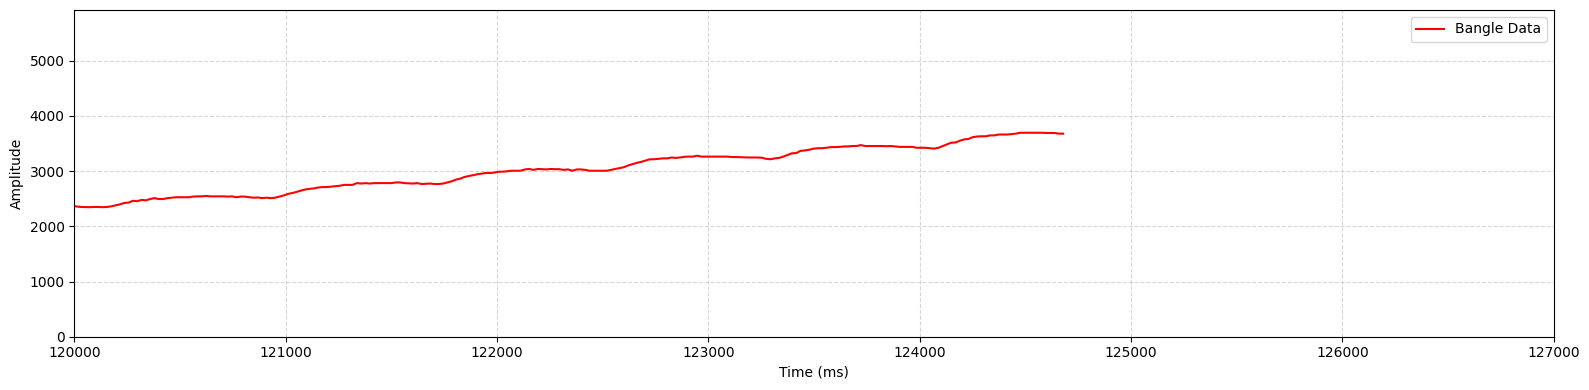

In [3]:
timestamps = bangle_data["timestamp_ms"].to_numpy()
ppg_raw = bangle_data["value"].to_numpy()

' Normalizing timestamp (ms), such that it starts from 0 ms'
t0 = bangle_data["timestamp_ms"].iloc[0]
timestamps = timestamps - t0

plt.figure(figsize=(16, 4))
plt.plot(timestamps, ppg_raw, c='r', label="Bangle Data")
plt.grid(which='both', axis='both', linestyle='--', alpha=0.5)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(left=120000, right=127000)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

### **Finding Peaks In Filtered PPG Data**

In [4]:
from scipy.signal import find_peaks

dt = np.diff(timestamps) / 1000.0
fs = 1 / np.mean(dt)
print(f"Estimated PPG sampling rate: {fs:.1f} Hz")

min_dist = int(0.5 * fs)
peaks, props = find_peaks(ppg_raw, distance=min_dist, height=np.mean(ppg_raw))

Estimated PPG sampling rate: 46.0 Hz


In [9]:
from scipy.signal import peak_prominences
prominences = peak_prominences(ppg_raw, peaks)[0]
print(prominences)
print(len(peaks), len(prominences))

[ 144.  200.  200.  112.   64.   64.   92.  152.  144.  112.  128.  128.
   56.   96.   64.   24.  120.  112.   96.  104.   96.  192.  144.  120.
  128.   96.   48.   48.   96.  104.  128.  136. 2336.  112.   80.   40.
   16.   40.   48.   48.   24.   44.   64.   76.   88. 2440.   24.   96.
   64.   16.    8.   64.   80.   56.   64.   48.   32.   64.  112.  176.
 3488.  160.  144.  136.   96.   80.   56.  128.  128.   96.  104.  120.
  384.  104.   96.  104.   64.   48.   32.   32.]
80 80


### **Plotting Peaks In Filtered PPG Data**

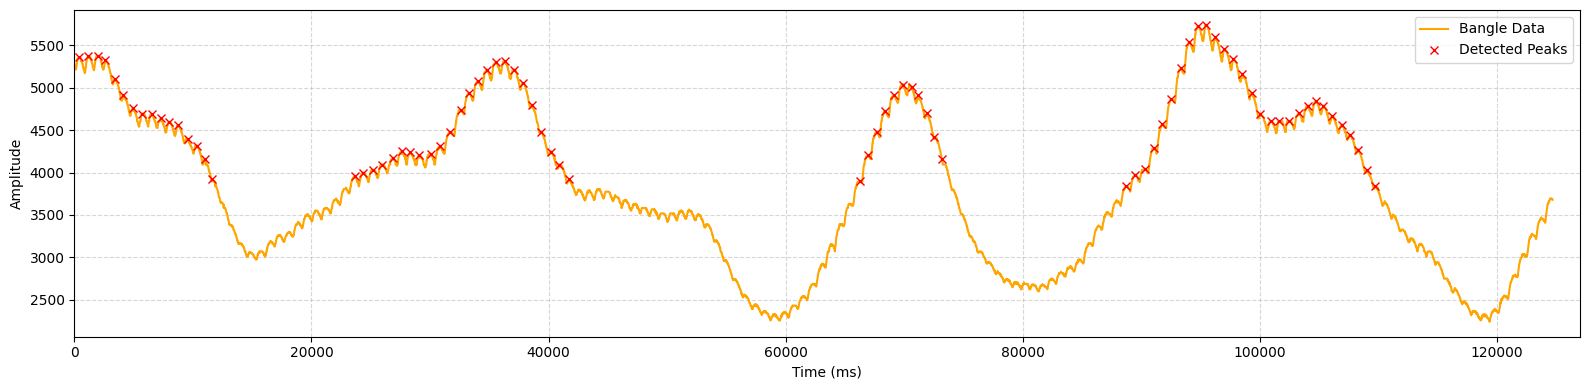

In [6]:
plt.figure(figsize=(16, 4))
plt.plot(timestamps, ppg_raw, c='orange', label="Bangle Data")
plt.plot(timestamps[peaks], ppg_raw[peaks], 'x', c='red', label="Detected Peaks")
plt.grid(which='both', axis='both', linestyle='--', alpha=0.5)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(left=0, right=127000)
plt.tight_layout()
plt.show()